In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import datetime

Importing the Loan Prediction Dataset:


In [ ]:
covid=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/Covid-19_US.csv')

Identification of data types:

In [ ]:
covid.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

Size of the dataset:

In [ ]:
covid.shape

(58, 18)

Statistical Summary of Numeric Variables:

In [ ]:
covid.describe

<bound method NDFrame.describe of               Province_State Country_Region  ...  Testing_Rate  Hospitalization_Rate
0                    Alabama             US  ...   3353.942386             11.438860
1                     Alaska             US  ...   5063.940017                   NaN
2             American Samoa             US  ...    222.857246                   NaN
3                    Arizona             US  ...   2272.859351             12.022005
4                   Arkansas             US  ...   3189.670370             10.693584
5                 California             US  ...   3492.893832                   NaN
6                   Colorado             US  ...   2289.339188             17.348774
7                Connecticut             US  ...   5349.302875             28.054438
8                   Delaware             US  ...   4663.552976                   NaN
9           Diamond Princess             US  ...           NaN                   NaN
10      District of Columbia   

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Non-Graphical Univariate Analysis:



In [ ]:
#To get the count of unique values:

covid['Province_State'].value_counts()

Arkansas                    1
Louisiana                   1
Indiana                     1
New Hampshire               1
Idaho                       1
Connecticut                 1
Colorado                    1
South Dakota                1
Virginia                    1
Delaware                    1
Alabama                     1
Kansas                      1
Guam                        1
Maryland                    1
Vermont                     1
Pennsylvania                1
Maine                       1
Georgia                     1
Virgin Islands              1
Northern Mariana Islands    1
Grand Princess              1
Utah                        1
Montana                     1
Nevada                      1
California                  1
New York                    1
Alaska                      1
American Samoa              1
District of Columbia        1
Oregon                      1
Michigan                    1
Mississippi                 1
Iowa                        1
Florida   

In [ ]:
#To get list of unique values

covid['Province_State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Diamond Princess', 'District of Columbia', 'Florida', 'Georgia',
       'Grand Princess', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virgin Islands', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
#To get the Total Number of States Affected

print("Number of States affected: ",len(covid["Province_State"].unique()))

Number of States affected:  58


In [ ]:
#Number of confirmed cases in the States
print("Number of confirmed cases in the states: ",datewise["Confirmed"].iloc[-1])

Number of confirmed cases in the states:  1551853


In [ ]:
#Number of cases Recovered in the States
print("Number of cases Recovered in the States: ",datewise["Recovered"].iloc[-1])

Number of cases Recovered in the States:  294543.26719999994


In [ ]:
#Number of Death cases in the States
print("Number of Death cases in the States: ",datewise["Deaths"].iloc[-1])

Number of Death cases in the States:  93439


In [ ]:
#Number of Active cases in the States
print("Number of Active cases in the States: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))

Number of Active cases in the States:  1163870.7328


In [ ]:
#Per Day confirmed Cases in the States
print("Number of confirmed cases per day in the States: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))

Number of confirmed cases per day in the States:  1551853.0


In [ ]:
#Per Day Recovered Cases in the States
print("Number of Recovered cases per day in the States: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))

Number of Recovered cases per day in the States:  294543.0


In [ ]:
#Per Day Death Count in the States
print("Number of Death per day in the States: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))

Number of Death per day in the States:  93439.0


In [ ]:
#Finding null values

print(covid.isnull().sum(axis = 0))

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64


In [ ]:
#Remove Null Values

covid.Lat.fillna(value=14.454200,inplace=True)
covid.Long_.fillna(value=14.454200,inplace=True)
covid.Incident_Rate.fillna(value=14.454200,inplace=True)
covid.People_Tested.fillna(value=14.454200,inplace=True)
covid.Recovered.fillna(value=14.454200,inplace=True)
covid.People_Hospitalized.fillna(value=14.454200,inplace=True)
covid.Mortality_Rate.fillna(value=14.454200,inplace=True)
covid.Testing_Rate.fillna(value=14.454200,inplace=True)
covid.Hospitalization_Rate.fillna(value=14.454200,inplace=True)

In [ ]:
#Check again if null values are handled
print(covid.isnull().sum(axis = 0))

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64


Graphical Univariate Analysis:


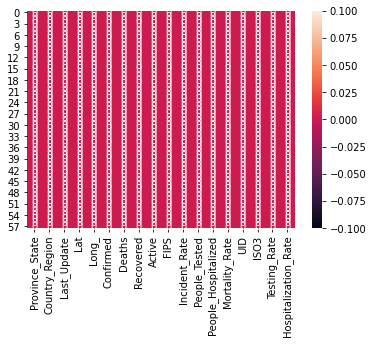

In [ ]:
#checking the distribution of values using Heatmap for test dataset

sns.heatmap(covid.isnull(), annot= True)
plt.show()

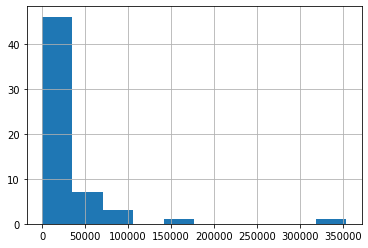

In [ ]:
#Histogram

covid['Confirmed'].hist(bins=10)

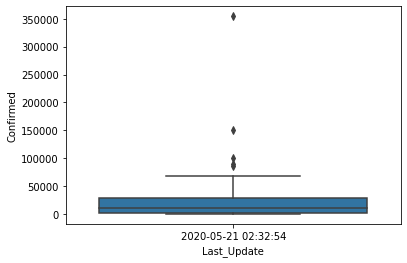

In [ ]:
#Boxplot

#Plot between the Last_Update and Confirmed column

sns.boxplot(x=covid['Last_Update'],y=covid['Confirmed'])

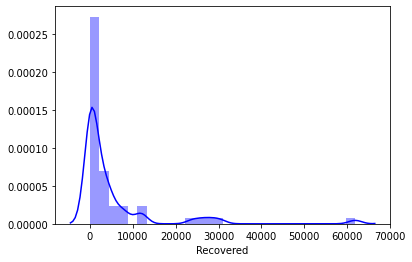

In [ ]:
#DistPlot

sns.distplot(covid[pd.notnull(covid.Recovered)]['Recovered'],color='blue')

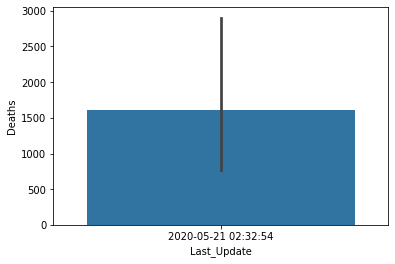

In [ ]:
#BarPlot

sns.barplot(x=covid['Last_Update'],y=covid['Deaths'])

In [ ]:
#Checking the skewness
print('Skewness:', covid.skew())

Skewness Train: Lat                    -1.889484
Long_                   2.975954
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.650738
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.968474
People_Tested           2.812222
People_Hospitalized     6.887754
Mortality_Rate          1.264371
UID                    -3.027480
Testing_Rate            1.028091
Hospitalization_Rate    0.827529
dtype: float64


In [ ]:
#checking for correaltion between variables

covid.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.369441,0.147130,0.138688,0.114003,0.144824,-0.359254,0.288615,0.128736,0.093015,-0.333684,0.699968,0.396939,-0.066066
Long_,-0.369441,1.000000,-0.024686,0.000466,-0.039317,-0.021573,0.351131,-0.023375,-0.121377,0.013252,0.036496,-0.471802,0.042984,0.070462
Confirmed,0.147130,-0.024686,1.000000,0.982191,0.757022,0.985218,-0.096696,0.714440,0.829562,0.846612,0.289237,0.153972,0.345248,0.287274
Deaths,0.138688,0.000466,0.982191,1.000000,0.782459,0.954378,-0.075053,0.712297,0.742859,0.888679,0.335203,0.120043,0.348860,0.297770
Recovered,0.114003,-0.039317,0.757022,0.782459,1.000000,0.634497,-0.092720,0.527124,0.602215,0.689248,0.225850,0.149986,0.284444,0.206519
Active,0.144824,-0.021573,0.985218,0.954378,0.634497,1.000000,-0.092276,0.706267,0.830926,0.816262,0.278185,0.146354,0.333319,0.284244
FIPS,-0.359254,0.351131,-0.096696,-0.075053,-0.092720,-0.092276,1.000000,-0.174830,-0.140187,-0.052001,-0.235861,0.058022,-0.351449,0.003082
Incident_Rate,0.288615,-0.023375,0.714440,0.712297,0.527124,0.706267,-0.174830,1.000000,0.455091,0.535154,0.269145,0.249956,0.633516,0.192470
People_Tested,0.128736,-0.121377,0.829562,0.742859,0.602215,0.830926,-0.140187,0.455091,1.000000,0.611702,0.165728,0.225065,0.263211,0.250495
People_Hospitalized,0.093015,0.013252,0.846612,0.888679,0.689248,0.816262,-0.052001,0.535154,0.611702,1.000000,0.224879,0.084546,0.281496,0.363003


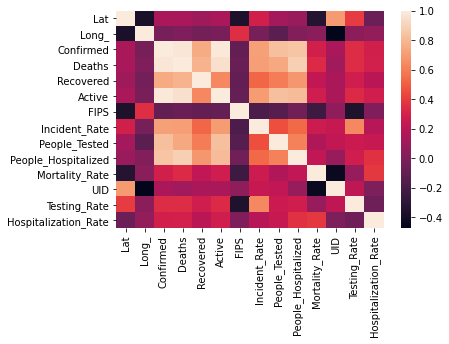

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(covid.corr())

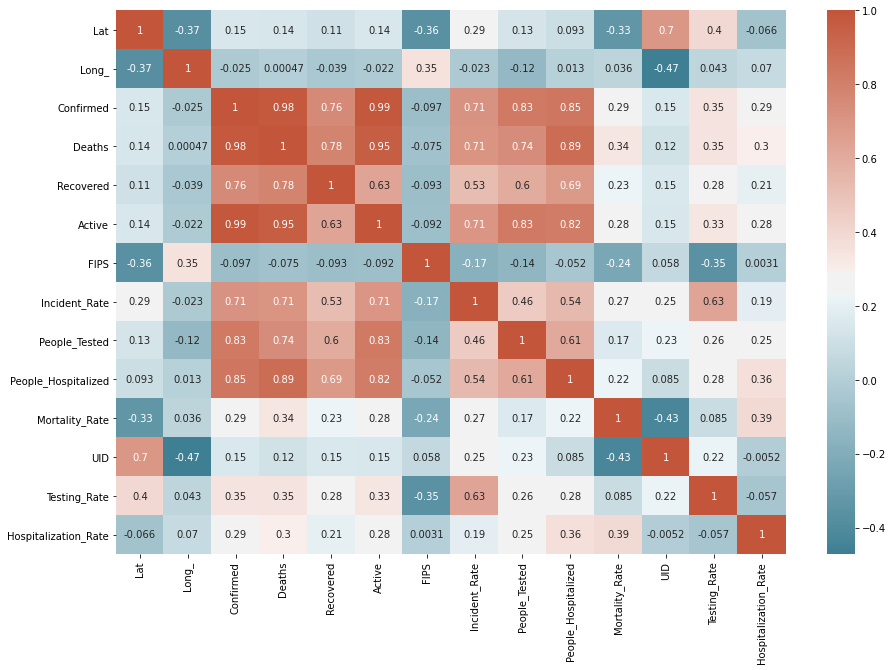

In [ ]:
corr = covid.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
covid['Mortality_Rate'] = le.fit_transform(covid['Mortality_Rate'])
covid['Hospitalization_Rate'] = le.fit_transform(covid['Hospitalization_Rate'])
covid.head(5)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,14.4542,12530.0,1,266.194321,164450.0,1493.0000,22,84000001,USA,3353.942386,11
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0000,39.0,2,54.815493,37045.0,14.4542,9,84000002,USA,5063.940017,17
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,14.4542,0.0,60,0.000000,124.0,14.4542,57,16,ASM,222.857246,17
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0000,10386.0,4,204.788838,165435.0,1792.0000,37,84000004,USA,2272.859351,12
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0000,1044.0,5,165.782801,96258.0,535.0000,6,84000005,USA,3189.670370,9


In [ ]:
#Drop Column
covid.drop('Province_State',axis=1,inplace=True)
covid.drop('Country_Region',axis=1,inplace=True)
covid.drop('Last_Update',axis=1,inplace=True)
covid.drop('ISO3',axis=1,inplace=True)

In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = covid['Hospitalization_Rate']
X = covid

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.86      1.00      0.92         6
          18       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          25       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00    

In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

Decision Tree: 0.433333 (0.008667)
Decision Tree with Gini Coefficient: 0.433333 (0.008667)
K Nearest Neighbors: 0.330000 (0.014767)
Naive Bayes: 0.363333 (0.008322)
Random Forrest: 0.433333 (0.008667)
Random Forrest with Gini Coefficient: 0.433333 (0.008667)
Bagging Classifier: 0.433333 (0.008667)
Ada Boost Classifier: 0.416667 (0.008944)
Gradient Boosting Classifier: 0.433333 (0.008667)
XGB Classifier: 0.433333 (0.008667)
XGBRF Classifier: 0.433333 (0.008667)


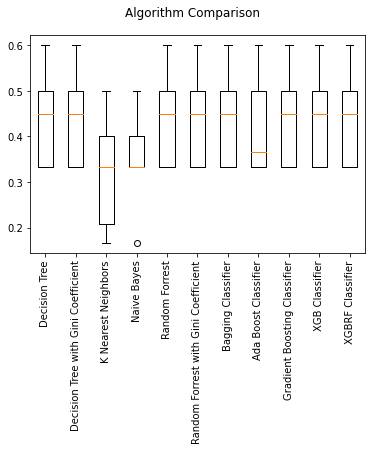

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()